In [ ]:
###### GLOBAL VAR ######
id_list = 0
id = None
img_w = 0
img_h = 0
result = 0
###1 Use WebCam Recoding
import cv2
import glob
import os
import matplotlib.pyplot as plt
import torch
import gc
gc.collect()

torch.cuda.empty_cache() 
path = os.getcwd()
img_path = os.getcwd() + '/tmp'

# cap = cv2.VideoCapture(0)
# framenum = 0
# while True:
#     ret, frame = cap.read()

#     if ret:
#         cv2.imshow('녹화 중', frame)
#         cv2.imwrite(img_path+f'/{framenum:07d}.png', frame)
#         framenum += 1
#         if cv2.waitKey(1) == ord('q'):
#             break
#     else:
#         break


def person_seg_plus():
    global id_list
    global result
    ret = np.zeros((img_h, img_w))
    for i in result[1][0]:
        ret = np.logical_or(ret, i)
    return ret

def person_seg_minus(id):
    global id_list
    if id == None:
        pass
    
    else:
        idx=id_list.index(id)
        id_list.remove(id)
        id_list.insert(idx, 50000)
        id = None
    
        

def img2video():
    fps = 30  # 24 fps or 30 fps

    fourcc = cv2.VideoWriter_fourcc(*"mp4v")

    names = sorted(glob.glob(img_path + '/*.png'))
    img = cv2.imread(names[0])
    size = (img.shape[1], img.shape[0])

    videoWrite = cv2.VideoWriter(img_path + 'test' + '.mp4', fourcc, fps, size) 

    for name in names:
        img = cv2.imread(name)
        videoWrite.write(img)

    videoWrite.release()

# img2video()


###2 load && Detection



# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = '/home/jovyan/Desktop/mmdetection/configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()



import numpy as np

cap2 = cv2.VideoCapture(path+'/3.mp4')
framenum=0
while True:
    ret, img = cap2.read()
   
    if ret:
        img_h, img_w, _ = img.shape
        global result
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        result = inference_detector(model, img)
        
        id_list = list(range(len(result[0][0])))
        person_seg_minus(id) # 나중에 입력 받은 값 넣어서 id 처리(블러 해제)
        
        person_detection = result[0][0] #  person BB + conf Score
        
        person_segmentation = person_seg_plus()
        
        blur_person_segmentation = cv2.blur(img, (25, 25))

        person_segmentation = person_segmentation.astype('uint8')
            
        cvt_blur_person_segmentation = cv2.cvtColor(person_segmentation, cv2.COLOR_GRAY2RGB)

        

        bg_mask_img  = np.logical_not(person_segmentation)
        bg_mask_img = bg_mask_img.astype('uint8')
        cvt_bg_mask_img = cv2.cvtColor(bg_mask_img, cv2.COLOR_GRAY2BGR)

        
        
        blur_region =  blur_person_segmentation * cvt_blur_person_segmentation
        bg_img = img * cvt_bg_mask_img
        
        mosic_img = blur_region + bg_img
        
        
       
        
        
#         plt.figure(figsize=(20,10))
#         plt.imshow(cv2.cvtColor(mosic_img,cv2.COLOR_BGR2RGB))
#         plt.title('Blurred')
#         plt.xticks([]), plt.yticks([])
#         plt.show()
#         show_result_pyplot(model, mosic_img, result, score_thr=0.3)

#         cv2.imwrite(img_path+f'/{framenum:07d}.png', cv2.cvtColor(mosic_img,cv2.COLOR_RGB2BGR))
        framenum += 1
    else:
        break
img2video()

In [6]:
img2video()

Found existing installation: mmdet 2.23.0
Uninstalling mmdet-2.23.0:
  Successfully uninstalled mmdet-2.23.0


Note: you may need to restart the kernel to use updated packages.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
###### GLOBAL VAR ######
id_list = 0
id = None
img_w = 0
img_h = 0
result = 0
###1 Use WebCam Recoding
import cv2
import glob
import os
import matplotlib.pyplot as plt
import torch
import gc
gc.collect()

torch.cuda.empty_cache() 
path = os.getcwd()
img_path = os.getcwd() + '/tmp'

# cap = cv2.VideoCapture(0)
# framenum = 0
# while True:
#     ret, frame = cap.read()

#     if ret:
#         cv2.imshow('녹화 중', frame)
#         cv2.imwrite(img_path+f'/{framenum:07d}.png', frame)
#         framenum += 1
#         if cv2.waitKey(1) == ord('q'):
#             break
#     else:
#         break


def person_seg_plus():
    global id_list
    global result
    ret = np.zeros((img_h, img_w))
    for i in result[1][13]:
        ret = np.logical_or(ret, i)
    return ret

def person_seg_minus(id):
    global id_list
    if id == None:
        pass
    
    else:
        idx=id_list.index(id)
        id_list.remove(id)
        id_list.insert(idx, 50000)
        id = None
    
        

def img2video():
    fps = 30  # 24 fps or 30 fps

    fourcc = cv2.VideoWriter_fourcc(*"mp4v")

    names = sorted(glob.glob(img_path + '/*.png'))
    img = cv2.imread(names[0])
    size = (img.shape[1], img.shape[0])

    videoWrite = cv2.VideoWriter(img_path + 'test' + '.mp4', fourcc, fps, size) 

    for name in names:
        img = cv2.imread(name)
        videoWrite.write(img)

    videoWrite.release()

# img2video()


###2 load && Detection



# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = '/home/jovyan/Desktop/mmdetection/configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

In [ ]:

import numpy as np

cap2 = cv2.VideoCapture(path+'/3.mp4')
framenum=0

img = cv2.imread('demo.jpg')

img_h, img_w, _ = img.shape
global result
result = inference_detector(model, img)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[False  True]


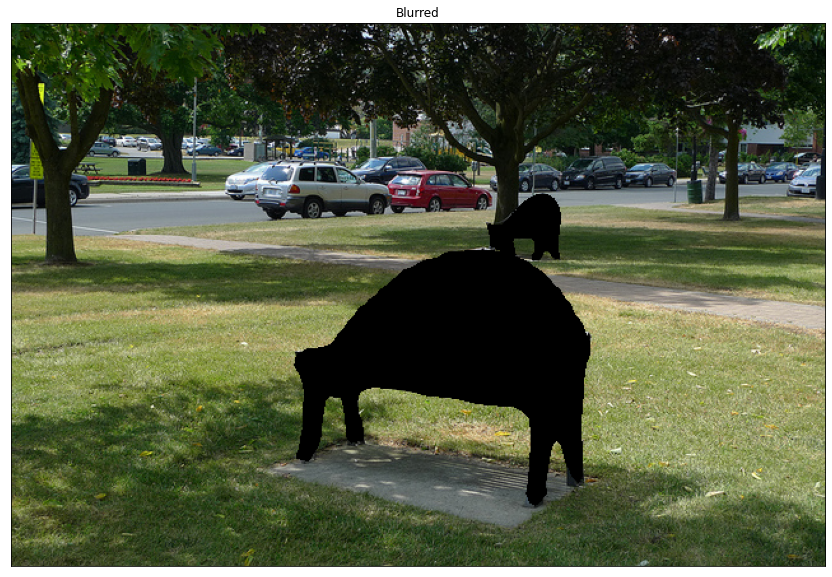

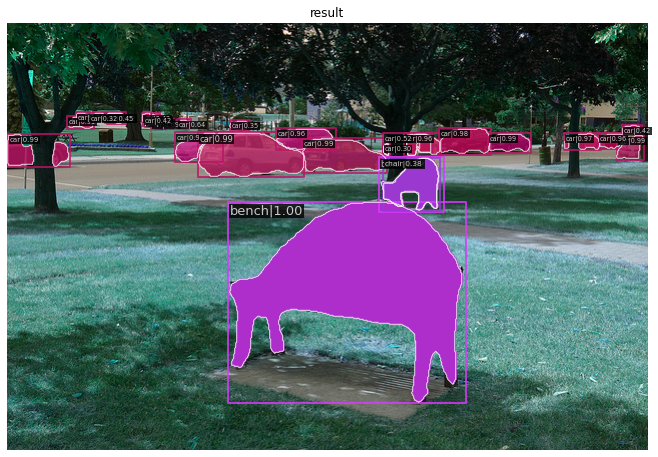

In [13]:


id_list = list(range(len(result[0][13])))
person_seg_minus(id) # 나중에 입력 받은 값 넣어서 id 처리(블러 해제)

person_detection = result[0][13] #  person BB + conf Score

person_segmentation = person_seg_plus()

blur_person_segmentation = cv2.blur(img, (25, 25))

person_segmentation = person_segmentation.astype('uint8')

cvt_blur_person_segmentation = cv2.cvtColor(person_segmentation, cv2.COLOR_GRAY2RGB)



bg_mask_img  = np.logical_not(person_segmentation)
print(bg_mask_img)
print(np.unique(bg_mask_img))
bg_mask_img = bg_mask_img.astype('uint8')
cvt_bg_mask_img = cv2.cvtColor(bg_mask_img, cv2.COLOR_GRAY2BGR)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur_region =  blur_person_segmentation * cvt_blur_person_segmentation

bg_img = img * cvt_bg_mask_img

mosic_img = blur_region + bg_img





plt.figure(figsize=(20,10))

plt.imshow(bg_img)
plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

show_result_pyplot(model, bg_img, result, score_thr=0.3)
# cv2.imwrite(img_path+f'/{framenum:07d}.png', cv2.cvtColor(mosic_img,cv2.COLOR_RGB2BGR))

# img2video()